In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [11]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
cancer.feature_names 

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
from sklearn.model_selection import train_test_split


In [21]:
X=cancer.data
y=cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [22]:
np.shape(X_train)

(426, 30)

In [23]:
np.shape(X_test)

(143, 30)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
Lgr=LogisticRegression().fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
Lgr.score(X_train,y_train)*100

96.0093896713615

<h2>The testing model is able to make 96% predictions accurate

In [28]:
Lgr.score(X_test,y_test)*100

95.8041958041958

<h2>The training model is able to make 95.8~96% predictions accurate

<h2>By changing the random_state in Train_Test_Split, accuracy will also get changed.

In [29]:
#lets look at accuracy by changing the random_state
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)


In [30]:
Lgr=LogisticRegression().fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
Lgr.score(X_train,y_train)*100

95.77464788732394

In [54]:
Lgr.score(X_test,y_test)*100

95.8041958041958

<h2>Now by using more regularized Logistic Regression Model by changing C value.

In [47]:

Lgr001 = LogisticRegression(C=0.001).fit(X_train, y_train)


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
Lgr001.score(X_train,y_train)*100

91.78403755868545

In [49]:
Lgr001.score(X_test,y_test)*100

96.5034965034965

In [50]:
Lgr100 = LogisticRegression(C=100).fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
Lgr100.score(X_train,y_train)*100

97.41784037558685

In [52]:
Lgr100.score(X_test,y_test)*100

95.8041958041958

<h2>As seen above the accuracy is changed</h2>

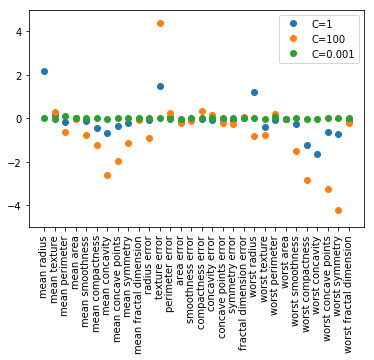

In [53]:
plt.plot(Lgr.coef_.T, 'o', label="C=1")
plt.plot(Lgr100.coef_.T, 'o', label="C=100")
plt.plot(Lgr001.coef_.T, 'o', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend()